# protostars
## 29- SMM1-- another protostar
### I. Save the spectrum to HDF5

Here we save the data to HDF5 so Starfish can read it in.

Michael Gully-Santiago  
May 2017

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [3]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

## Read in all the data.
No spot-checking necessary, since we already did that in the previous notebook.

In [4]:
import pandas as pd

In [5]:
dat = pd.read_csv('../data/spectra/SMM1_2014Jun19.txt', delim_whitespace=True, names=['wavelength_A', 'flux'])
dat.head()

,wavelength_A,flux
0,20484.750000,4718.621
1,20489.023886,5051.693
2,20493.297772,5120.408
3,20497.571658,5429.998
4,20501.845545,5091.645


In [6]:
dat['flux'] = dat['flux']/np.median(dat['flux'])

## Save the file format
We want HDF5, actually...

Do some data munging.

In [7]:
wavelength_angstrom = np.array(dat.wavelength_A.values)
f_star = np.array(dat.flux.values)
sig_star = f_star*1.0/30.0

^^Assumes $S/N = 30$

In [8]:
masks = (f_star != f_star) | ((sig_star != sig_star))

In [9]:
masks.sum()

0

In [10]:
import h5py

In [11]:
name_out = 'SMM1_NIRSPEC.hdf5'

In [12]:
f = h5py.File("../data/reduced/"+name_out, "w")
dset1 = f.create_dataset('wls', data=wavelength_angstrom) #Angstroms
dset2 = f.create_dataset('fls', data=f_star)
dset3 = f.create_dataset('sigmas', data=sig_star)
dset4 = f.create_dataset('masks', data=masks)
f.close()

(0, 1.3)

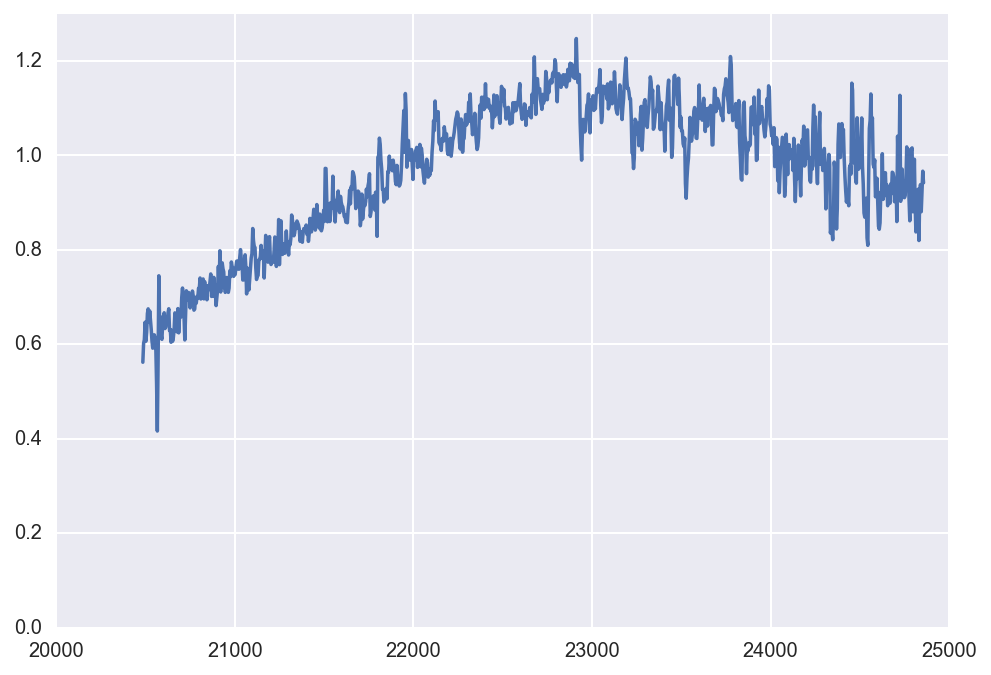

In [13]:
plt.plot(dat.wavelength_A, dat.flux)
plt.ylim(0)

# Truncate the dataset

In [23]:
name_out = 'SMM1_NIRSPEC_CO_NaI.hdf5'

In [24]:
gi = (wavelength_angstrom > 21950) & (wavelength_angstrom < 23950)

In [25]:
f = h5py.File("../data/reduced/"+name_out, "w")
dset1 = f.create_dataset('wls', data=wavelength_angstrom[gi]) #Angstroms
dset2 = f.create_dataset('fls', data=f_star[gi])
dset3 = f.create_dataset('sigmas', data=sig_star[gi])
dset4 = f.create_dataset('masks', data=masks[gi])
f.close()

## The end.